In this Jupyter Notebook, we will perform the following steps to analyze and visualize sleep data:

1. Import necessary libraries.
2. Load the sleep dataset in EDF format.
3. Extract EEG, EOG, and EMG channels from the dataset.
4. Apply a bandpass filter to the data.
5. Plot a 30-second epoch of the sleep data for each channel.
6. Save the plot as a PNG file.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

# Load the sleep dataset
file_path = 'SC4001E0-PSG.edf' 
raw = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from d:\Sleep-Data-Analysis\Script\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


Now that we have imported the necessary libraries and loaded the sleep dataset, let's extract the EEG, EOG, and EMG channels we are interested in.


In [2]:
# Extract EEG, EOG, and EMG channels
eeg_channel = 'EEG Fpz-Cz'
eog_channel = 'EOG horizontal'
emg_channel = 'EMG submental'
raw.pick_channels([eeg_channel, eog_channel, emg_channel])

<RawEDF | SC4001E0-PSG.edf, 3 x 7950000 (79500.0 s), ~182.0 MB, data loaded>

Next, we will apply a bandpass filter to the data, keeping only the frequencies between 0.5 Hz and 49 Hz

In [3]:
# Filter the data with a bandpass filter ranging from 0.5 Hz to 49 Hz
raw.filter(l_freq=0.5, h_freq=49)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 49.50 Hz)
- Filter length: 661 samples (6.610 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished


<RawEDF | SC4001E0-PSG.edf, 3 x 7950000 (79500.0 s), ~182.0 MB, data loaded>

Now that we have preprocessed the data, let's plot a 30-second epoch of the sleep data for each channel (EEG, EOG, and EMG).

Text(0.5, 0, 'Time (s)')

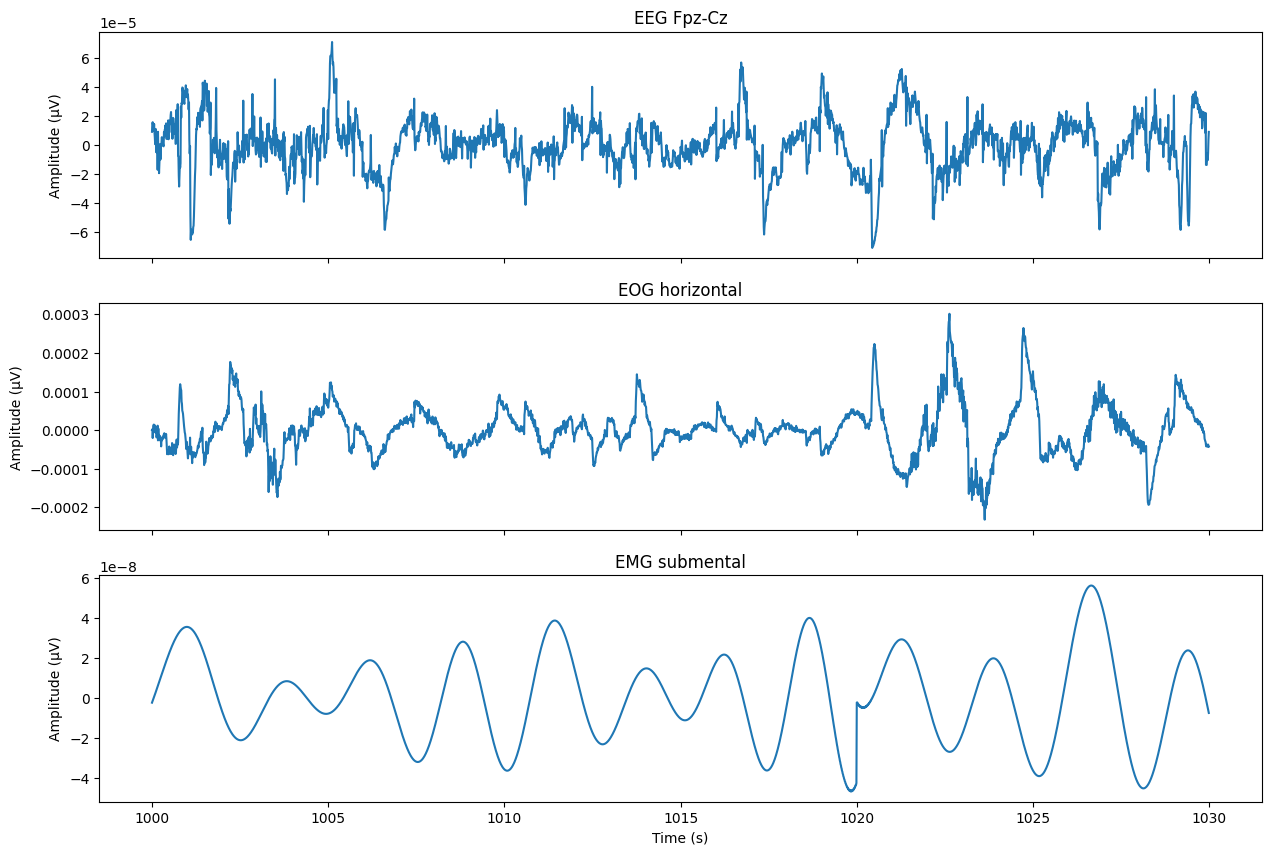

In [4]:
# Plot a 30-second epoch of the sleep data
start_time = 1000  # in seconds
epoch_duration = 30  # in seconds
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10), sharex=True)

# Loop over EEG, EOG, and EMG channels and plot their signals
for ax, channel in zip(axes, [eeg_channel, eog_channel, emg_channel]):
    # Extract data and time from the selected epoch
    data, times = raw[channel, int(start_time * raw.info['sfreq']):int((start_time + epoch_duration) * raw.info['sfreq'])]
    
    # Plot the data
    ax.plot(times, data.T)
    ax.set_title(channel)
    ax.set_ylabel('Amplitude (µV)')

# Set the label for the x-axis
axes[-1].set_xlabel('Time (s)')

Finally, we will save the plot as a high-resolution PNG file.


In [5]:
# Save the figure as a PNG file with a resolution of 500 dpi and a tight bounding box
fig.savefig('sleep_data.png', dpi=600, bbox_inches='tight')
